# Insurance prediction project

### Machine Learning regression project

**Goal** - Predict charges based on data

In [8]:
# Packages

import pandas as pd

### 1. Data read 

In [9]:
import pandas as pd

df = pd.read_csv(r'C:\Users\groch\Desktop\JobPath\Statascratch\Time-Series---Neural-Networks\Data\insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

### 2. EDA

In [5]:
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


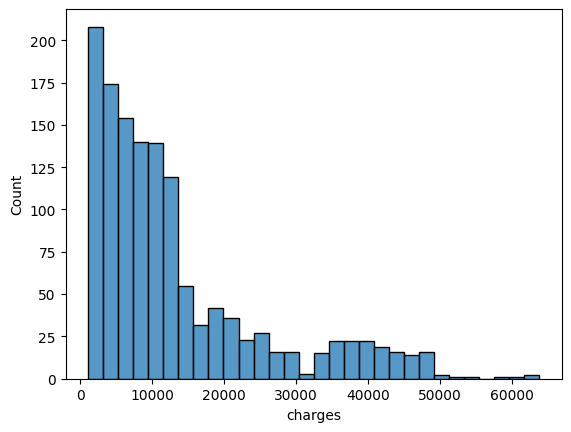

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['charges'])
plt.show()

### Target Distribution Analysis

The target variable (`charges`) exhibits a **strong right-skewed distribution** with a long heavy tail.
Most observations are concentrated at relatively low values, while a small number of cases reach
very high values.

This pattern indicates that the target is **not normally distributed** and contains **rare but
extreme values** that are likely meaningful rather than data errors.

#### Key observations:
- The distribution is highly **asymmetric** with a long right tail.
- A small number of observations have disproportionately large values.
- The variance increases with the magnitude of the target (heteroscedasticity).

#### Implications:
- Models assuming normally distributed errors (e.g. ordinary least squares linear regression)
  may perform poorly without adjustments.
- Loss functions that heavily penalize large errors (e.g. Mean Squared Error) may be dominated
  by extreme values, leading to suboptimal performance for the majority of observations.
- The extreme values should not be removed, as they likely represent valid, high-impact cases.

#### Recommended next steps:
- Apply a **logarithmic transformation** to the target variable to reduce skewness and stabilize variance.
- Use evaluation metrics that are more robust to outliers, such as **Mean Absolute Error (MAE)**.
- Compare linear models on transformed targets with **tree-based models** (e.g. Random Forest,
  Gradient Boosting) that can naturally handle non-linear relationships and heteroscedasticity.
- Inspect residuals after modeling to verify improvements in error structure.


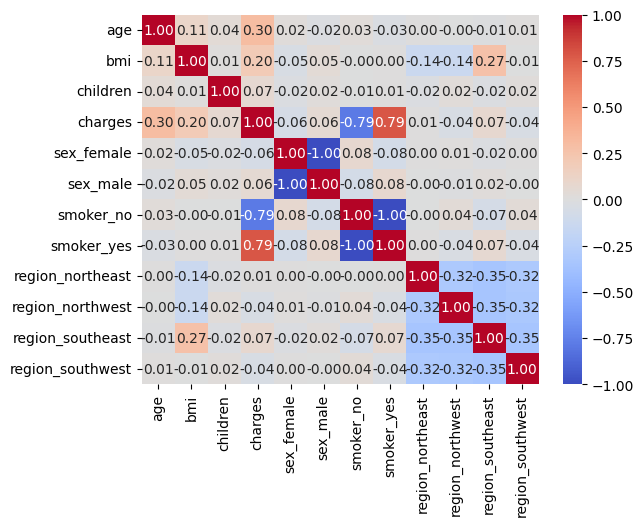

In [15]:
# Correlation

corr = df.corr()

plt.Figure(figsize= (20, 20))
sns.heatmap(corr, annot= True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Key observations:
- High correletion between our target and positive smoker value

### 3. Feature Engineering

### 4. Model training

##### Non log-transformed data

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {

}

##### Log transformed data